# Lab1 - Scikit-learn
Author: Arman Hosseinsarraf

## 1. Overview

At the end, you are asked to answer the following questions in **Section 5.1 Questions** in the notebook:

1. For each task (classification and regression), which model performs best on the validation data using all features?
2. For each task (classification and regression), which model performs best on the validation data using two principal components?
3. In each task (classification and regression), for each model, how do full feature and two principal component model scores compare on the validation data?
4. Do any of the models underfit or overfit? Provide examples.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Function definitions

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def get_classifier_accuracy(model, X, y):
    '''Calculate train and validation accuracy of classifier (model)
        
        Splits feature matrix X and target vector y 
        with sklearn train_test_split() and random_state=956.
        
        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: training accuracy, validation accuracy
    
    '''
    
    #TODO: IMPLEMENT FUNCTION BODY
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=956)
    
    model.fit(X_train, y_train)
    y_pred_training = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    training_accuracy = round(accuracy_score(y_train, y_pred_training), 3)
    validation_accuracy = round(accuracy_score(y_test, y_pred), 3)

    return training_accuracy, validation_accuracy

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def get_regressor_mse(model, X, y):
    '''Calculate train and validation mean-squared error (mse) of regressor (model)
        
        Splits feature matrix X and target vector y 
        with sklearn train_test_split() and random_state=956.
        
        model (sklearn regressor): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: training mse, validation mse
    
    '''
   
    #TODO: IMPLEMENT FUNCTION BODY
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=956)
    
    model.fit(X_train,y_train)
    yfit_train = model.predict(X_train)
    yfit = model.predict(X_test)
    
    training_accuracy = round(mean_squared_error(y_train, yfit_train), 1)
    validation_accuracy = round(mean_squared_error(y_test, yfit), 1)

    return training_accuracy, validation_accuracy

In [4]:
from sklearn.decomposition import PCA

def get_n_principal_components(X, n=2):
    '''Extracts n principal componets from feature matrix X using sklearn PCA.
        X (pandas.DataFrame): A feature matrix
        n (int): number of principal components
        
        returns: feature matrix with n columns as numpy.array
    '''
    
    #TODO: IMPLEMENT FUNCTION BODY
    model = PCA(n_components=n)
    model.fit(X)
    X_nD = model.transform(X)
    
    return X_nD

## 3. Classification

Using yellowbrick spam - classification  
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

The goal is to compare `LogisticRegression(max_iter=2000)` and `RandomForestClassifier(random_state=88)` classification performance on a validation set with full features and first two principal components.

### 3.1 Load data

Load the spam data set into feature matrix `X` and target vector `y`.

Call `get_n_principal_components()` to obtain feature matrix `X_2D` containing the first two principal components.

Print dimensions and type of `X`, `y`, and `X_2D`.


In [5]:
# TODO: ADD YOUR CODE HERE
from yellowbrick.datasets import load_spam
X , y = load_spam(data_home=None, return_dataset=False)
X_2D = get_n_principal_components(X, 2)

print(f"Dimension of X is: {X.shape}, and type of X is: {type(X)}")
print(f"Dimension of y is: {y.shape}, and type of X is: {type(y)}")
print(f"Dimension of X_2D is: {X_2D.shape}, and type of X is: {type(X_2D)}")

Dimension of X is: (4600, 57), and type of X is: <class 'pandas.core.frame.DataFrame'>
Dimension of y is: (4600,), and type of X is: <class 'pandas.core.series.Series'>
Dimension of X_2D is: (4600, 2), and type of X is: <class 'numpy.ndarray'>


### 3.2 Train and evaluate models

1. Import `LogisticRegression` and `RandomForestClassifier` from sklearn
2. Instantiate models `LogisticRegression(max_iter=2000)` and `RandomForestClassifier(random_state=88)` in a list.
3. create a for loop iterating the models list:
    - Call `get_classifier_accuracy()` using all features, i.e. `X`.
    - Call `get_classifier_accuracy()` using PCA features, i.e. `X_2D`.
    - Print training and validation accuracy for both. Limit output to **3 decimal places**.

In [6]:
# TODO: ADD YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

logistic_reg = LogisticRegression(max_iter=2000)
random_forest = RandomForestClassifier(random_state=88)

models=[logistic_reg, random_forest]

for model in models:
    print(f"Model is:{model}, for all features --> training accuracy, validation accuracy: {get_classifier_accuracy(model, X, y)}")
    print(f"Model is:{model}, for PCA features --> training accuracy, validation accuracy: {get_classifier_accuracy(model, X_2D, y)}\n")

Model is:LogisticRegression(max_iter=2000), for all features --> training accuracy, validation accuracy: (0.934, 0.918)
Model is:LogisticRegression(max_iter=2000), for PCA features --> training accuracy, validation accuracy: (0.729, 0.725)

Model is:RandomForestClassifier(random_state=88), for all features --> training accuracy, validation accuracy: (0.999, 0.944)
Model is:RandomForestClassifier(random_state=88), for PCA features --> training accuracy, validation accuracy: (0.999, 0.771)



### 3.3 Plot PCA feautures
Use a Seaborn `scatterplot` to visulaize the two PCA components using the lables in `y` as `hue`.

Label x- and y-axis and add a title.

<AxesSubplot:>

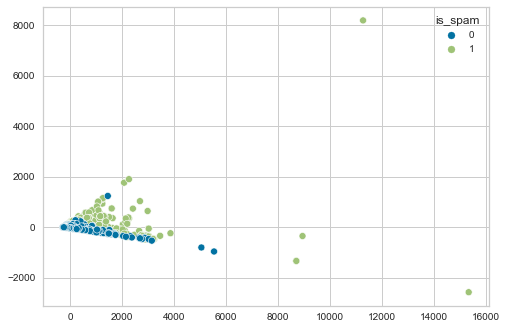

In [7]:
# TODO: ADD YOUR CODE HERE
sns.scatterplot(x=X_2D[:,0], y=X_2D[:, 1], hue=y)

## 4. Regression

Using yellowbrick energy - regression  
https://www.scikit-yb.org/en/latest/api/datasets/energy.html

The goal is to compare `LinearRegression()` and `RandomForestRegressor(random_state=88)` regression performance on a validation set with full features and first two principal components.

### 4.1 Load data

Load the energy data set into feature matrix `X` and target vector `y`.

Call `get_n_principal_components()` to obtain feature matrix `X_2D` containing the first two principal components.

Print dimensions and type of `X`, `y`, and `X_2D`.

In [8]:
# TODO: ADD YOUR CODE HERE
from yellowbrick.datasets import load_energy
X_energy , y_energy = load_energy(data_home=None, return_dataset=False)
X_2D_energy = get_n_principal_components(X_energy, 2)

print(f"Dimension of X is: {X_energy.shape}, and type of X is: {type(X_energy)}")
print(f"Dimension of y is: {y_energy.shape}, and type of X is: {type(y_energy)}")
print(f"Dimension of X_2D is: {X_2D_energy.shape}, and type of X is: {type(X_2D_energy)}")

Dimension of X is: (768, 8), and type of X is: <class 'pandas.core.frame.DataFrame'>
Dimension of y is: (768,), and type of X is: <class 'pandas.core.series.Series'>
Dimension of X_2D is: (768, 2), and type of X is: <class 'numpy.ndarray'>


### 4.2 Train and evaluate models

1. Import `LinearRegression` and `RandomForestRegressor` from sklearn
2. Instantiate models `LinearRegression()` and `RandomForestRegressor(random_state=88)` in a list.
3. create a for loop iterating the models list:
    - Call `get_regressor_mse()` using all features, i.e. `X`.
    - Call `get_regressor_mse()` using PCA features, i.e. `X_2D`.
    - Print training and validation accuracy for both. Limit output to **1 decimal place**.

In [9]:
# TODO: ADD YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

linear_reg = LinearRegression()
random_regressor = RandomForestRegressor(random_state=88)

models = [linear_reg, random_regressor]

for model in models:
    print(f"Model is:{model}, for all features --> training mse, validation mse: {get_regressor_mse(model, X_energy, y_energy)}")
    print(f"Model is:{model}, for PCA features --> training mse, validation mse: {get_regressor_mse(model, X_2D_energy, y_energy)}\n")


Model is:LinearRegression(), for all features --> training mse, validation mse: (8.0, 10.3)
Model is:LinearRegression(), for PCA features --> training mse, validation mse: (22.2, 19.6)

Model is:RandomForestRegressor(random_state=88), for all features --> training mse, validation mse: (0.0, 0.2)
Model is:RandomForestRegressor(random_state=88), for PCA features --> training mse, validation mse: (9.6, 8.6)



### 4.3 Plot PCA feautures
Use a Seaborn `scatterplot` to visulaize the two PCA components using the values in `y` as `hue` and `size`.

Label x- and y-axis and add a title.

<AxesSubplot:>

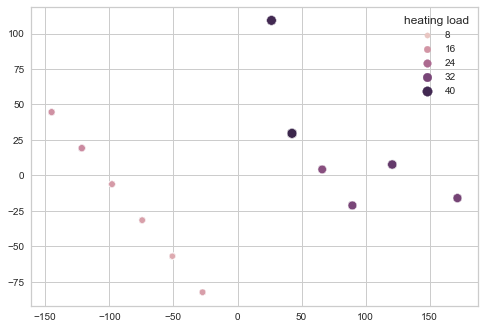

In [10]:
# TODO: ADD YOUR CODE HERE
sns.scatterplot(x=X_2D_energy[:,0], y=X_2D_energy[:, 1], hue=y_energy, size=y_energy)

## 5. Observations/Interpretation

### 5.1 Questions
1. For each task (classification and regression), which model performs best on the validation data using all features?

**Classification:**  

RandomForestClassifier 

**Regression:**  

RandomForestRegressor

2. For each task (classification and regression), which model performs best on the validation data using two principal components?

**Classification:**  

RandomForestClassifier

**Regression:**  

RandomForestRegressor

3. In each task (classification and regression), for each model, how do full feature and two principal component model scores compare on the validation data?

**Classification:**  

LogisticRegression all features --> validation accuracy: 0.918
LogisticRegression 2 PCA features --> validation accuracy: 0.725

RandomForestClassifier all features --> validation accuracy: 0.944
RandomForestClassifier 2 PCA features --> validation accuracy: 0.771

LogisticRegression: The comparison shows that the LogisticRegression model trained using all the features outperformed the same model trained by two principal components.

RandomForestClassifier: The comparison shows that the RandomForestClassifier model trained using all the features outperformed the same model trained by two principal components.

**Regression:**  

LinearRegression all features --> validation mse: 10.3
LinearRegression 2 PCA features --> validation mse: 19.6

RandomForestRegressor all features --> validation mse: 0.2
RandomForestRegressor 2 PCA features --> validation mse: 8.6

LinearRegression: The comparison shows that the LinearRegression model trained using all the features outperformed the same model trained by two principal components.

RandomForestRegressor: The comparison shows that the RandomForestRegressor model trained using all the features outperformed the same model trained by two principal components.

4. Do any of the models underfit or overfit? Provide examples.

**Underfitting**   

The LogisticRegression model trained by 2 PCA features producing the training accuracy, validation accuracy:(0.729, 0.725) is relatively underfitting compared to RandomForestClassifier.

The LinearRegression model trained by 2 PCA features producing the training mse, validation mse: (22.2, 19.6) is relatively underfitting compared to RandomForestRegressor.

One reason to support this finding could be a lower number of features (only two PCA features) used for training those two models mentioned above.

**Overfitting**   

Although no golden standard exists to demonstrate when a model is overfitting, the RandomForestClassifier model trained using 2 PCA features seems to be overfitting due to a slightly meaningful difference of 22% between training and validation scores (0.999, 0.771).

### 5.2 Conclusion
Conclude on any one pattern you see emerge in your answers to questions above. Include the data to justify your conclusion.

The results from classification and regression models indicate that the models trained by all the features outperformed the models trained by only 2 PCA features.
In this experiment, the analysis shows that applying the PCA to the dataset reduced the dimensionality of the data so that the models saw less number of samples during training.
For example, the RandomForestClassifier trained by all features produced a validation accuracy score of 0.944 whereas the same model trained by 2 PCA features produced a validation accuracy of 0.771.
The same pattern is seen for the LogisticRegression classifier.

## 6. Reflection
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


This assignment enabled me to implement classification and regression models and perform the evaluation analysis using the broadly used sklearn library.
The first interesting observation was a lower validation mse than training mse happened to LinearRegression for 2 PCA features training mse, validation mse: (22.2, 19.6).
The second interesting while confusing item was the principal component analysis. I did some research and some scientist have different opinions to apply PCA since the use of this technique is challenging as we are not certain if the performance of the modeling improves or not.
